In [1]:
!python --version

Python 3.10.14


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pwd

/home/user/energygpt/chronos


In [4]:
# datasets = ['LCL_c_168_h_168', 'BOREALIS_c_168_h_168', 'SCEAUX_c_168_h_168', 'SMART_c_168_h_168', 'IDEAL_c_168_h_168']
datasets = ['LCL', 'BOREALIS', 'SCEAUX', 'SMART', 'IDEAL']

In [5]:
def load_results(datasets, result_type):
    results = []
    for dataset in datasets:
        print(dataset)
        files = glob.glob(f'/home/user/energygpt/chronos/results/{dataset}/{result_type}*.csv')
        b_count = 0
        for f in files:            
            df = pd.read_csv(f)
            print(f, df.shape)
            #df = df[df.NRMSE <= 1]
            print(f, df.shape, ' After filtering')
            df.insert(0, 'dataset', dataset)
            df.insert(0, 'result_type', result_type)
            df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
            results.append(df)                
            b_count += df.shape[0]
        print(dataset, b_count, '\n')
            
    results_df = pd.concat(results)
    return results_df

In [6]:
result_type = 'agg_metrics'
test_agg = load_results(datasets, result_type)
print(test_agg.shape)

# result_type = 'finetuned_agg_metrics'
# finetuned_agg = load_results(datasets, result_type)
# print(finetuned_agg.shape)

LCL
/home/user/energygpt/chronos/results/LCL/agg_metrics_LCL-2012.csv (703, 9)
/home/user/energygpt/chronos/results/LCL/agg_metrics_LCL-2012.csv (703, 9)  After filtering
/home/user/energygpt/chronos/results/LCL/agg_metrics_LCL-2013.csv (702, 9)
/home/user/energygpt/chronos/results/LCL/agg_metrics_LCL-2013.csv (702, 9)  After filtering
LCL 1405 

BOREALIS
/home/user/energygpt/chronos/results/BOREALIS/agg_metrics_Borealis.csv (15, 9)
/home/user/energygpt/chronos/results/BOREALIS/agg_metrics_Borealis.csv (15, 9)  After filtering
BOREALIS 15 

SCEAUX
/home/user/energygpt/chronos/results/SCEAUX/agg_metrics_Sceaux.csv (4, 9)
/home/user/energygpt/chronos/results/SCEAUX/agg_metrics_Sceaux.csv (4, 9)  After filtering
SCEAUX 4 

SMART
/home/user/energygpt/chronos/results/SMART/agg_metrics_SMART.csv (11, 9)
/home/user/energygpt/chronos/results/SMART/agg_metrics_SMART.csv (11, 9)  After filtering
SMART 11 

IDEAL
/home/user/energygpt/chronos/results/IDEAL/agg_metrics_IDEAL.csv (350, 9)
/home/user

In [7]:
# test_agg.columns
test_agg[['SMAPE', 'NRMSE']].describe()

,SMAPE,NRMSE
count,1785.000000,1785.000000
mean,0.426886,inf
std,0.163520,NaN
min,0.075173,0.178093
25%,0.325146,0.675563
50%,0.409767,0.878520
75%,0.495449,1.103107
max,2.000000,inf


In [8]:
# finetuned_agg.dataset.value_counts().sum() + 1435
#test_agg = test_agg[test_agg.NRMSE <=1]

In [9]:
test_agg[['SMAPE', 'NRMSE']].describe()

,SMAPE,NRMSE
count,1785.000000,1785.000000
mean,0.426886,inf
std,0.163520,NaN
min,0.075173,0.178093
25%,0.325146,0.675563
50%,0.409767,0.878520
75%,0.495449,1.103107
max,2.000000,inf


## agg - Test vs. Finetuned - ALL

In [10]:
# For 168
combined = test_agg#pd.concat([test_agg, finetuned_agg])

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

# res_agg1.mul(100).round(2).to_csv('./results_finetuned/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results_finetuned/commercial.tex')
res_agg1.mul(100).round(2)

SMAPE               NRMSE           
              mean    std median  mean std median
result_type                                      
agg_metrics  42.69  16.35  40.98   inf NaN  87.85

In [11]:
#For 24
combined = test_agg#pd.concat([test_agg, finetuned_agg])

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

# res_agg1.mul(100).round(2).to_csv('./results_finetuned/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results_finetuned/commercial.tex')
res_agg1.mul(100).round(2)

SMAPE               NRMSE           
              mean    std median  mean std median
result_type                                      
agg_metrics  42.69  16.35  40.98   inf NaN  87.85

In [8]:
#For 96
combined = test_agg#pd.concat([test_agg, finetuned_agg])

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

# res_agg1.mul(100).round(2).to_csv('./results_finetuned/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results_finetuned/commercial.tex')
res_agg1.mul(100).round(2)

SMAPE               NRMSE           
              mean    std median  mean std median
result_type                                      
agg_metrics  45.49  17.75  43.55   inf NaN  86.59

In [11]:
combined.head()

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,LCL,LCL-2012.csv,MAC004982_2012,0.106976,0.011444,0.047160,0.965758,0.715853,1.398784,0.734122
1,agg_metrics,LCL,LCL-2012.csv,MAC002854_2012,0.268765,0.072234,0.096908,0.669341,0.539362,2.096638,0.657473
2,agg_metrics,LCL,LCL-2012.csv,MAC004653_2012,0.163317,0.026672,0.104066,0.571238,0.622539,0.917824,0.877969
3,agg_metrics,LCL,LCL-2012.csv,MAC002871_2012,0.135776,0.018435,0.062595,0.354153,0.358126,0.818116,0.721708
4,agg_metrics,LCL,LCL-2012.csv,MAC005430_2012,0.147613,0.021790,0.076777,0.297825,0.339007,0.764779,1.117145


In [12]:
combined.filename.value_counts()/2

filename
LCL-2012.csv    351.5
LCL-2013.csv    351.0
Borealis.csv      7.5
SMART.csv         5.5
Sceaux.csv        2.0
Name: count, dtype: float64

## add - Test  by dataset

In [12]:
#For 168
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

# res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

NRMSE
                      median
result_type dataset         
agg_metrics BOREALIS   74.10
            IDEAL     102.31
            LCL        84.01
            SCEAUX     75.76
            SMART      88.62

In [18]:
# For 24
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'NRMSE', 'SMAPE', 'MAE', 'MSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {'SMAPE': ['median'],
                                                                    'NRMSE': ['median'],
                                                                    'MAE': ['median']})
                                                                    
    # 'NRMSE': ['median']})

# res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

SMAPE   NRMSE    MAE
                     median  median median
result_type dataset                       
agg_metrics BOREALIS  33.63   74.10  24.02
            IDEAL     40.92  102.31  16.71
            LCL       41.04   84.01   7.37
            SCEAUX    48.87   75.76  53.13
            SMART     42.44   88.62  35.84

In [14]:
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'filename', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset', 'filename']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

#res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
#res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

NRMSE
                                  median
result_type dataset  filename           
agg_metrics BOREALIS Borealis.csv  74.10
            LCL      LCL-2012.csv  83.96
                     LCL-2013.csv  84.29
            SCEAUX   Sceaux.csv    75.76
            SMART    SMART.csv     88.62

In [15]:
combined['NRMSE'].describe()

count    1785.000000
mean             inf
std              NaN
min         0.178093
25%         0.675563
50%         0.878520
75%         1.103107
max              inf
Name: NRMSE, dtype: float64

Index(['BOREALIS', 'SCEAUX', 'LCL', 'SMART', 'IDEAL'], dtype='object', name='dataset')


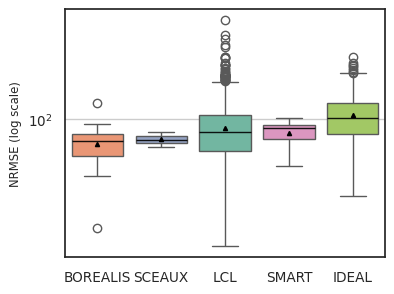

In [13]:
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'serif',
      'font.size' : 14}
plt.rcParams.update(rc)

#seaborn.set(style='whitegrid')
seaborn.set(style='white', font_scale=0.7)


plt.figure(figsize=(4, 3))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = combined.reset_index().copy()
#map_names = {'BDG-2-50epoch': 'BDG-2', 'Electricity-50epoch': 'Electricity', 'Buildings-900K-test-50epoch': 'Buildings-900K-test'}
#test_agg1['dataset'] = test_agg1['dataset'].map(map_names)

test_agg1.NRMSE = test_agg1.NRMSE * 100
#test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
#test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
#test_agg1.building_type = test_agg1.building_type.str.capitalize()

# Find the order
my_order = test_agg1.groupby(by=["dataset"])["NRMSE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='dataset', y='NRMSE', fill=True, hue='dataset',
                      order=my_order,                       
                medianprops=dict(color="black", alpha=0.9),
                      showmeans=True,
                meanprops={
                       "markeredgecolor": "black",
                       "markersize": "3",
                'markerfacecolor':'black'},
                      palette='Set2',
                data=test_agg1,
                     legend=False)
res.tick_params(labelsize=9.8)
res.set_yscale('log')

plt.title(label='')

plt.ylabel("NRMSE (log scale)")
# plt.ylim(0,400)
plt.xlabel("")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
plt.savefig("chronos-nrmse-error-residential-dataset-boxplot.pdf", bbox_inches='tight')
plt.show()

In [32]:
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 7})
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["figure.figsize"] = (3, 3)
# # plt.figure(figsize=(2, 2))

# copy_df = test_agg['NRMSE'].reset_index()
# all_df = pd.DataFrame(copy_df['NRMSE'] * 100)
# #assembly_df
# all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True)
# median = all_df.sort_values('NRMSE').quantile(0.5)
# plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))

# plt.title(label='')

# plt.ylabel("CDF")
# #plt.ylim(0,125)
# plt.xlabel("NRMSE")
# #plt.xticks(rotation=90)
# plt.grid(axis='y')
# plt.gcf().tight_layout()
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# # plt.savefig("chronos-residential-error-cdfplot.pdf", bbox_inches='tight')
# plt.show()

In [33]:
# sns.set(font_scale=1)  # crazy big
# sns.set_theme(style="whitegrid")


# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 14})
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["figure.figsize"] = (5, 3.3)
# # plt.figure(figsize=(3, 3))

# copy_df = test_agg['NRMSE'].reset_index()
# all_df = pd.DataFrame(copy_df['NRMSE'] * 100)
# #assembly_df
# all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color='black')
# # median = all_df.sort_values('NRMSE').quantile(0.5)
# # plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# # #plt.text(x = xmedian['NRMSE'], median['cdf'])
# # plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# # q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# # plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# # plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# # q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# # plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# # plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# # q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# # plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# # plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))
# copy_df = test_agg.reset_index()
# copy_df['NRMSE'] = copy_df['NRMSE'] * 100
# copy_df = copy_df.sort_values('NRMSE')
# ax = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='dataset')
# ax.set_xscale('log')
# sns.move_legend(ax, "lower right", title='')

# plt.title(label='')
# # plt.legend()
# plt.ylabel("CDF")
# #plt.ylim(0,125)
# plt.xlabel("NRMSE (log scale)")
# #plt.xticks(rotation=90)
# plt.grid(axis='y')
# plt.gcf().tight_layout()

# plt.subplots_adjust(wspace=0.05, hspace=0)
# # plt.savefig("chronos-residential-error-cdfplot.pdf", bbox_inches='tight')
# plt.show()

/tmp/ipykernel_975569/3085024545.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lines, linestyle, legend_handle in zip(ax.lines[::-1], ['--', '-', 'dashdot'], ax.legend_.legendHandles):


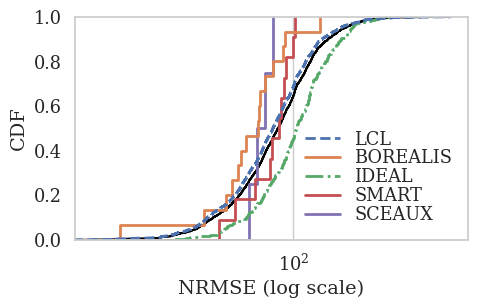

In [31]:
# sns.set(font_scale=1)  # crazy big
sns.set_theme(style="whitegrid", font_scale=1.16)


date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)

# plt.figure(figsize=(3, 3))
fig, ax = plt.subplots()

copy_df = test_agg['NRMSE'].reset_index()
all_df = pd.DataFrame(copy_df['NRMSE'] * 100)
#assembly_df
all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color='black')
ax_c = seaborn.ecdfplot(data=all_df.sort_values('NRMSE'), x="NRMSE", ax=ax, color='black')
# median = all_df.sort_values('NRMSE').quantile(0.5)
# plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))
copy_df = test_agg.reset_index()
copy_df['NRMSE'] = copy_df['NRMSE'] * 100
copy_df = copy_df.sort_values('NRMSE')
# name = ['Mean', 'LCL', 'BOREALIS', 'IDEAL', 'SMART', 'SCEAUX']
ax_s = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='dataset', ax=ax, lw=2)


for lines, linestyle, legend_handle in zip(ax.lines[::-1], ['--', '-', 'dashdot'], ax.legend_.legendHandles):
    lines.set_linestyle(linestyle)
    legend_handle.set_linestyle(linestyle)

#plt.xlim(0,80)
ax_s.set_xscale('log')
# ax.legend(labels=name)
sns.move_legend(ax, "lower right", title='', labelspacing=0.05, frameon=False)

plt.title(label='')
# plt.legend()
plt.ylabel("CDF")
#plt.ylim(0,125)
plt.xlabel("NRMSE (log scale)")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("chronos-residential-error-cdfplot.pdf", bbox_inches='tight')
plt.show()

In [20]:
test_agg[test_agg['NRMSE'] > 0.9].sort_values('NRMSE', ascending=False)

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
59,agg_metrics,LCL,LCL-2012.csv,MAC004672_2012,0.229894,0.052851,0.093945,NaN,2.000000,inf,0.056907
111,agg_metrics,LCL,LCL-2013.csv,MAC004672_2013,0.208858,0.043622,0.085494,NaN,2.000000,inf,NaN
377,agg_metrics,LCL,LCL-2013.csv,MAC002136_2013,0.208858,0.043622,0.085494,NaN,2.000000,inf,NaN
205,agg_metrics,LCL,LCL-2013.csv,MAC002873_2013,0.062711,0.003933,0.014366,0.802359,1.670655,3.859383,3.286445
650,agg_metrics,LCL,LCL-2013.csv,MAC002863_2013,0.125563,0.015766,0.045875,0.359766,1.008992,3.170947,0.769217
...,...,...,...,...,...,...,...,...,...,...,...
327,agg_metrics,IDEAL,IDEAL.csv,home268_2018,0.151893,0.023072,0.067394,0.301446,0.306194,0.902344,1.006062
552,agg_metrics,LCL,LCL-2013.csv,MAC003333_2013,0.166220,0.027629,0.082741,0.353818,0.341984,0.901903,0.962489
280,agg_metrics,LCL,LCL-2013.csv,MAC003202_2013,0.143100,0.020478,0.075057,0.706256,0.460631,0.901508,0.718185
9,agg_metrics,SMART,SMART.csv,HomeC_2016,0.763418,0.582807,0.368784,0.489164,0.424381,0.901120,0.832458


In [28]:
test_agg[test_agg['dataset'] == 'LCL'].building.apply(lambda x: x.split('_')[0]).unique().shape

(713,)

In [23]:
test_agg[test_agg['dataset'] == 'LCL'].building.unique().shape

(1405,)

In [19]:
grouped = test_agg.sort_values('NRMSE', ascending=False).groupby('dataset')

In [20]:
for dataset in test_agg.dataset.unique():
    print(dataset, grouped.get_group(dataset).building.unique().shape)

LCL (1405,)
BOREALIS (15,)
SCEAUX (4,)
SMART (11,)
IDEAL (350,)


In [14]:
grouped = test_agg[test_agg['NRMSE'] > 0.5].sort_values('NRMSE', ascending=False).groupby('dataset')

In [15]:
for dataset in test_agg.dataset.unique():
    print(dataset, grouped.get_group(dataset).shape)

LCL (1241, 11)
BOREALIS (13, 11)
SCEAUX (4, 11)
SMART (11, 11)
IDEAL (343, 11)


In [54]:
# result_type = 'ts_metrics'
# test_ts = load_results(datasets, result_type)
# print(test_ts.shape)

# result_type = 'ts_metrics'
# finetuned_ts = load_results(datasets, result_type)
# print(finetuned_ts.shape)

BDG-2
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Rat_clean=2017.csv (93534, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Panther_clean=2017.csv (37485, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Fox_clean=2017.csv (47481, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Fox_clean=2016.csv (47256, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Bear_clean=2017.csv (32487, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Rat_clean=2016.csv (99166, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Bear_clean=2016.csv (27924, 33)
BDG-2 385333 

(385333, 35)
BDG-2
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Rat_clean=2017.csv (93534, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Panther_clean=2017.csv (37485, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Fox_clean=2017.csv (47481, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Fox_clean=2016.csv (47256, 33)
/home/user/energygpt/moira

In [55]:
# test_ts.columns

Index(['result_type', 'dataset', 'filename', 'building', 'item_id',
       'forecast_start', 'MSE', 'abs_error', 'abs_target_sum',
       'abs_target_mean', 'seasonal_error', 'MASE', 'MAPE', 'sMAPE',
       'num_masked_target_values', 'ND', 'MSIS', 'QuantileLoss[0.1]',
       'Coverage[0.1]', 'QuantileLoss[0.2]', 'Coverage[0.2]',
       'QuantileLoss[0.3]', 'Coverage[0.3]', 'QuantileLoss[0.4]',
       'Coverage[0.4]', 'QuantileLoss[0.5]', 'Coverage[0.5]',
       'QuantileLoss[0.6]', 'Coverage[0.6]', 'QuantileLoss[0.7]',
       'Coverage[0.7]', 'QuantileLoss[0.8]', 'Coverage[0.8]',
       'QuantileLoss[0.9]', 'Coverage[0.9]'],
      dtype='object')

In [56]:
# finetuned_ts

,result_type,dataset,filename,building,item_id,forecast_start,MSE,abs_error,abs_target_sum,abs_target_mean,...,QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.6],Coverage[0.6],QuantileLoss[0.7],Coverage[0.7],QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9]
0,ts_metrics,BDG-2,Rat_clean=2017.csv,Rat_public_Emilee,Rat_public_Emilee_1,2017-01-08 00:00,38.343033,115.274399,480.480011,20.020000,...,115.274405,0.583333,119.875438,0.708333,110.054709,0.791667,96.924062,1.000000,71.896466,1.000000
1,ts_metrics,BDG-2,Rat_clean=2017.csv,Rat_public_Emilee,Rat_public_Emilee_2,2017-01-09 00:00,107.037069,195.874130,638.150024,26.589584,...,195.874133,0.041667,203.683261,0.250000,193.020078,0.416667,164.922477,0.500000,89.239088,0.666667
2,ts_metrics,BDG-2,Rat_clean=2017.csv,Rat_public_Emilee,Rat_public_Emilee_3,2017-01-10 00:00,21.753560,68.920860,609.530029,25.397085,...,68.920863,0.375000,64.155165,0.750000,67.480885,0.875000,59.069270,1.000000,52.380776,1.000000
3,ts_metrics,BDG-2,Rat_clean=2017.csv,Rat_public_Emilee,Rat_public_Emilee_4,2017-01-11 00:00,103.815867,169.039581,740.880005,30.870000,...,169.039587,0.458333,178.301936,0.500000,179.316795,0.500000,162.847334,0.541667,112.412702,0.583333
4,ts_metrics,BDG-2,Rat_clean=2017.csv,Rat_public_Emilee,Rat_public_Emilee_5,2017-01-12 00:00,152.835500,217.925751,739.099976,30.795832,...,217.925746,0.583333,236.915543,0.625000,242.105495,0.625000,227.117010,0.625000,180.834076,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27919,ts_metrics,BDG-2,Bear_clean=2016.csv,Bear_public_Rayna,Bear_public_Rayna_354,2016-12-26 00:00,605.484416,107.305145,1190.949951,49.622915,...,107.305141,1.000000,103.999588,1.000000,101.185730,1.000000,118.421831,1.000000,232.567099,1.000000
27920,ts_metrics,BDG-2,Bear_clean=2016.csv,Bear_public_Rayna,Bear_public_Rayna_355,2016-12-27 00:00,1555.771647,35.412754,1190.199951,49.591665,...,35.412754,0.750000,36.559361,0.916667,44.678808,1.000000,118.001639,1.000000,285.263354,1.000000
27921,ts_metrics,BDG-2,Bear_clean=2016.csv,Bear_public_Rayna,Bear_public_Rayna_356,2016-12-28 00:00,597.375773,29.715546,1213.625000,50.567708,...,29.715546,0.583333,26.117012,0.583333,22.124223,0.666667,17.727299,0.791667,57.431564,0.875000
27922,ts_metrics,BDG-2,Bear_clean=2016.csv,Bear_public_Rayna,Bear_public_Rayna_357,2016-12-29 00:00,24.887665,44.724327,1208.250000,50.343750,...,44.724327,0.541667,45.729494,0.625000,44.994292,0.708333,42.792245,0.708333,36.012273,0.833333


In [ ]:
#combined = pd.concat([test_agg, finetuned_agg])
cols = ['result_type', 'dataset', 'sMAPE', 'MSE']
res_ts2 = combined_ts[cols].groupby(['result_type', 'dataset']).agg( {'sMAPE': ['mean', 'std', 'median'],
                                                                      'MSE': ['mean', 'std', 'median']})

res_ts2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset_ts.csv')
res_ts2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset_ts.tex')
res_ts2.mul(100).round(2)

In [ ]:
#combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')

In [ ]:
# pd.concat([smape_d4.T, nrmse_d4.T], axis=0)

In [ ]:
# test_agg[['sMAPE', 'NRMSE']].mean()
# test_agg[['sMAPE', 'NRMSE']].median()

# # smape_d1 = finetuned_agg[cols].groupby(['dataset']).mean()
# # smape_d2 = finetuned_agg[cols].groupby(['dataset']).std()
# # smape_d3 = finetuned_agg[cols].groupby(['dataset']).median()
# # smape_d4 = pd.concat([smape_d1, smape_d2, smape_d3], axis=1)


In [ ]:
# # cols = ['dataset', 'filename', 'sMAPE']
# # finetuned_agg[cols].groupby(['dataset', 'filename']).mean()

# cols = ['dataset', 'sMAPE']
# smape_d1 = finetuned_agg[cols].groupby(['dataset']).mean()
# smape_d2 = finetuned_agg[cols].groupby(['dataset']).std()
# smape_d3 = finetuned_agg[cols].groupby(['dataset']).median()
# smape_d4 = pd.concat([smape_d1, smape_d2, smape_d3], axis=1)
# #smape_d4.columns = ['sMAPE_mean', 'sMAPE_std', 'sMAPE_median']
# smape_d4

In [ ]:
# smape_d4.columns

In [ ]:
# cols = ['dataset', 'NRMSE']
# nrmse_d1 = finetuned_agg[cols].groupby(['dataset']).mean()
# nrmse_d2 = finetuned_agg[cols].groupby(['dataset']).std()
# nrmse_d3 = finetuned_agg[cols].groupby(['dataset']).median()
# nrmse_d4 = pd.concat([nrmse_d1, nrmse_d2, nrmse_d3], axis=1)
# #nrmse_d4.columns = ['NRMSE_mean', 'NRMSE_std', 'NRMSE_median']
# nrmse_d4

In [ ]:
# pd.concat([smape_d4, nrmse_d4], axis=1)

In [ ]:
# d1

In [ ]:
# d2

In [ ]:
# pd.concat([d1, d2, d3], axis=1)

In [ ]:
# agg_results = {
#     'sMAPE_mean': test_agg.sMAPE.mean(),
#     'sMAPE_std': test_agg.sMAPE.std(),
#     'sMAPE_median': test_agg.sMAPE.median()
# }

# test_agg_results_df = pd.DataFrame([agg_results])
# agg_results_df

In [ ]:
# result_type = 'test_agg_metrics'
# #'test_agg'

# results = []
# for dataset in datasets:
#     print(dataset)
#     files = glob.glob(f'/home/user/energygpt/lagllama/results_finetuned/{dataset}/{result_type}*.csv')
#     for f in files:
#         print(f)
#         df = pd.read_csv(f)
#         df.insert(0, 'dataset', dataset)
#         df.insert(0, 'result_type', result_type)
#         df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
#         results.append(df)    
        
# results_df = pd.concat(results)
# results_df.head()

In [ ]:
# results_df.filename.value_counts()

In [ ]:
# results_df.building.value_counts()

In [ ]:
# results_df['filename'] = results_df.filename.apply(lambda s: os.path.basename(s))

In [ ]:
# #results_df.filename[0]
# results_df.filename.to_list()